# KICKSTARTER (final project)

**What is Kickstarter?**

Kickstarter is a funding platform for creative projects. Everything from film, games, and music to art, design, and technology. Kickstarter is full of ambitious, innovative, and imaginative projects that are brought to life through the direct support of others.

Every project creator sets their project's funding goal and deadline. If people like the project, they can pledge money to make it happen. If the project succeeds in reaching its funding goal, all backers' credit cards are charged when time expires. Funding on Kickstarter is all-or-nothing. If the project falls short of its funding goal, no one is charged.

**Objective**

Goal of this analysis it to be able to predict whether or not a project will receive it's goal funds.

**Data Source:**

https://webrobots.io/kickstarter-datasets/

## import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import math
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from deep_translator import GoogleTranslator
import langid

# scipy libraries
from scipy import stats
from scipy.stats.mstats import winsorize

# statsmodels libraries
import statsmodels.api as sm
from statsmodels.formula.api import ols

# sklearn libraries
from sklearn.preprocessing import OneHotEncoder, Normalizer, LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix
from sklearn.neighbors import KNeighborsRegressor

# balancing libraries
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

## import data

In [2]:
from src.math_functions import create_dataframe

df = create_dataframe()

## first review and clean data

### review

In [3]:
print("This dataset contains {} rows and {} columns".format(*df.shape))

This dataset contains 543589 rows and 39 columns


In [4]:
df.sample(5)

,backers_count,blurb,category,converted_pledged_amount,country,country_displayable_name,created_at,creator,currency,currency_symbol,...,source_url,spotlight,staff_pick,state,state_changed_at,static_usd_rate,urls,usd_pledged,usd_type,usd_exchange_rate
2880,16,Rising Phoenix Press is a start up poetry pres...,"{""id"":50,""name"":""Poetry"",""analytics_name"":""Poe...",426,US,the United States,1412301127,"{""id"":137995832,""name"":""Christian Sammartino"",...",USD,$,...,https://www.kickstarter.com/discover/categorie...,True,True,successful,1415990520,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",426.000000,international,1.0
2980,130,"In a dystopian world, a warrior priest travels...","{""id"":250,""name"":""Comic Books"",""analytics_name...",2699,US,the United States,1616422698,"{""id"":486332017,""name"":""Richard Kemp"",""slug"":""...",USD,$,...,https://www.kickstarter.com/discover/categorie...,False,False,live,1617714002,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",2699.000000,international,NaN
1536,2149,Two new pathways for Scion Second Edition! Sci...,"{""id"":34,""name"":""Tabletop Games"",""analytics_na...",168902,US,the United States,1607545390,"{""id"":200664283,""name"":""Richard Thomas"",""is_re...",USD,$,...,https://www.kickstarter.com/discover/categorie...,True,False,successful,1613674801,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",168902.000000,international,1.0
583,81,"Embrace destiny, or be consumed by it.","{""id"":252,""name"":""Graphic Novels"",""analytics_n...",3574,GB,the United Kingdom,1608851754,"{""id"":835041938,""name"":""Rich Perotta"",""slug"":""...",GBP,£,...,https://www.kickstarter.com/discover/categorie...,True,False,successful,1614726048,1.370526,"{""web"":{""project"":""https://www.kickstarter.com...",3531.844858,international,NaN
847,42,Our newest project! We are hard at it trying t...,"{""id"":318,""name"":""Faith"",""analytics_name"":""Fai...",3050,US,the United States,1488875223,"{""id"":453067419,""name"":""NewKings"",""is_register...",USD,$,...,https://www.kickstarter.com/discover/categorie...,True,False,successful,1491470444,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",3050.000000,international,1.0


### review column names

In [5]:
df.columns

Index(['backers_count', 'blurb', 'category', 'converted_pledged_amount',
       'country', 'country_displayable_name', 'created_at', 'creator',
       'currency', 'currency_symbol', 'currency_trailing_code',
       'current_currency', 'deadline', 'disable_communication', 'friends',
       'fx_rate', 'goal', 'id', 'is_backing', 'is_starrable', 'is_starred',
       'launched_at', 'location', 'name', 'permissions', 'photo', 'pledged',
       'profile', 'slug', 'source_url', 'spotlight', 'staff_pick', 'state',
       'state_changed_at', 'static_usd_rate', 'urls', 'usd_pledged',
       'usd_type', 'usd_exchange_rate'],
      dtype='object')

no cleaning of column names required

### drop duplicates

In [6]:
from src.math_functions import drop_and_compare_duplicates

df = drop_and_compare_duplicates(df)

### drop duplicate projects with different values

In [7]:
from src.math_functions import drop_and_compare_duplicate_id

df = drop_and_compare_duplicate_id(df)

### extract category information

In [8]:
from src.math_functions import get_category_data

get_category_data('category', df)

,backers_count,blurb,category,converted_pledged_amount,country,country_displayable_name,created_at,creator,currency,currency_symbol,...,staff_pick,state,state_changed_at,static_usd_rate,urls,usd_pledged,usd_type,usd_exchange_rate,category_slug,category_parent_name
0,4,Raising money to help my grandmother recover f...,"{""id"":44,""name"":""World Music"",""analytics_name""...",62,US,the United States,1476879198,"{""id"":1501687606,""name"":""Devan Porter"",""is_reg...",USD,$,...,False,failed,1479479560,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",62.000000,international,NaN,music/world music,Music
1,11,My work is performance based but I branch out ...,"{""id"":24,""name"":""Performance Art"",""analytics_n...",262,GB,the United Kingdom,1428415625,"{""id"":923770533,""name"":""Fiona Powell"",""is_regi...",GBP,£,...,False,successful,1430946012,1.491538,"{""web"":{""project"":""https://www.kickstarter.com...",258.036032,international,NaN,art/performance art,Art
2,18,A sanctuary for humans and felines alike! Come...,"{""id"":314,""name"":""Spaces"",""analytics_name"":""Sp...",776,US,the United States,1445787145,"{""id"":920978851,""name"":""Tori"",""is_registered"":...",USD,$,...,False,failed,1448555133,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",776.000000,international,NaN,food/spaces,Food
3,42,Taste Makers is a socially conscious brand tha...,"{""id"":269,""name"":""Ready-to-wear"",""analytics_na...",2158,CA,Canada,1426394434,"{""id"":1827655104,""name"":""Taste Makers By Trish...",CAD,$,...,True,failed,1438280891,0.811910,"{""web"":{""project"":""https://www.kickstarter.com...",2271.723453,international,NaN,fashion/ready-to-wear,Fashion
4,3,All your herbal tea remedies here. From colds ...,"{""id"":307,""name"":""Drinks"",""analytics_name"":""Dr...",96,US,the United States,1534903328,"{""id"":160842473,""name"":""Vito Finazzo"",""is_regi...",USD,$,...,False,failed,1540093916,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",96.000000,international,NaN,food/drinks,Food
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202430,13,An oboe recital with music and photography to ...,"{""id"":36,""name"":""Classical Music"",""analytics_n...",915,US,the United States,1375640768,"{""id"":1763180118,""name"":""Jennifer Stucki"",""is_...",USD,$,...,False,successful,1379825940,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",915.000000,international,NaN,music/classical music,Music
202431,52,"Growing fish and produce year round in the ""Po...","{""id"":305,""name"":""Community Gardens"",""analytic...",2460,CA,Canada,1419960769,"{""id"":1810768137,""name"":""Earl Decker"",""is_regi...",CAD,$,...,False,failed,1423675583,0.860877,"{""web"":{""project"":""https://www.kickstarter.com...",2660.971116,international,NaN,food/community gardens,Food
202432,53,MOMENTS OF INSIGHT is a project consisting of ...,"{""id"":20,""name"":""Conceptual Art"",""analytics_na...",18758,US,the United States,1303753700,"{""id"":1743305220,""name"":""Chaucer Silverson"",""i...",USD,$,...,True,successful,1312432269,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",18758.000000,international,NaN,art/conceptual art,Art
202433,0,Would like to be able to photograph dream wedd...,"{""id"":276,""name"":""Fine Art"",""analytics_name"":""...",0,CA,Canada,1404849038,"{""id"":667466823,""name"":""Laura"",""is_registered""...",CAD,$,...,False,failed,1406215380,0.938523,"{""web"":{""project"":""https://www.kickstarter.com...",0.000000,international,NaN,photography/fine art,Photography


In [13]:
df['category_parent_name'].value_counts()

Film & Video    27110
Music           26207
Technology      20471
Art             20344
Publishing      20174
Food            15650
Games           13304
Fashion         10996
Design           8172
Comics           7527
Photography      6633
Crafts           5855
Theater          5113
Journalism       3928
Dance            1831
Name: category_parent_name, dtype: int64

### convert timestamps

In [13]:
from src.math_functions import get_data_from_timestamp

get_data_from_timestamp('created_at', df)
get_data_from_timestamp('launched_at', df)
get_data_from_timestamp('deadline', df)

,backers_count,blurb,category,converted_pledged_amount,country,country_displayable_name,created_at,creator,currency,currency_symbol,...,category_parent_name,created_at_date,created_at_time,created_at_weekday,launched_at_date,launched_at_time,launched_at_weekday,deadline_date,deadline_time,deadline_weekday
0,4,Raising money to help my grandmother recover f...,"{""id"":44,""name"":""World Music"",""analytics_name""...",62,US,the United States,1476879198,"{""id"":1501687606,""name"":""Devan Porter"",""is_reg...",USD,$,...,Music,2016-10-19,14:13:18,Wednesday,2016-10-19,15:32:40,Wednesday,2016-11-18,15:32:40,Friday
1,11,My work is performance based but I branch out ...,"{""id"":24,""name"":""Performance Art"",""analytics_n...",262,GB,the United Kingdom,1428415625,"{""id"":923770533,""name"":""Fiona Powell"",""is_regi...",GBP,£,...,Art,2015-04-07,16:07:05,Tuesday,2015-04-08,00:37:44,Wednesday,2015-05-06,23:00:00,Wednesday
2,18,A sanctuary for humans and felines alike! Come...,"{""id"":314,""name"":""Spaces"",""analytics_name"":""Sp...",776,US,the United States,1445787145,"{""id"":920978851,""name"":""Tori"",""is_registered"":...",USD,$,...,Food,2015-10-25,16:32:25,Sunday,2015-10-27,16:25:33,Tuesday,2015-11-26,17:25:33,Thursday
3,42,Taste Makers is a socially conscious brand tha...,"{""id"":269,""name"":""Ready-to-wear"",""analytics_na...",2158,CA,Canada,1426394434,"{""id"":1827655104,""name"":""Taste Makers By Trish...",CAD,$,...,Fashion,2015-03-15,05:40:34,Sunday,2015-06-15,20:28:11,Monday,2015-07-30,20:28:11,Thursday
4,3,All your herbal tea remedies here. From colds ...,"{""id"":307,""name"":""Drinks"",""analytics_name"":""Dr...",96,US,the United States,1534903328,"{""id"":160842473,""name"":""Vito Finazzo"",""is_regi...",USD,$,...,Food,2018-08-22,04:02:08,Wednesday,2018-08-22,05:51:56,Wednesday,2018-10-21,05:51:56,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202430,13,An oboe recital with music and photography to ...,"{""id"":36,""name"":""Classical Music"",""analytics_n...",915,US,the United States,1375640768,"{""id"":1763180118,""name"":""Jennifer Stucki"",""is_...",USD,$,...,Music,2013-08-04,20:26:08,Sunday,2013-08-13,21:22:35,Tuesday,2013-09-22,06:59:00,Sunday
202431,52,"Growing fish and produce year round in the ""Po...","{""id"":305,""name"":""Community Gardens"",""analytic...",2460,CA,Canada,1419960769,"{""id"":1810768137,""name"":""Earl Decker"",""is_regi...",CAD,$,...,Food,2014-12-30,18:32:49,Tuesday,2015-01-02,18:26:23,Friday,2015-02-11,18:26:23,Wednesday
202432,53,MOMENTS OF INSIGHT is a project consisting of ...,"{""id"":20,""name"":""Conceptual Art"",""analytics_na...",18758,US,the United States,1303753700,"{""id"":1743305220,""name"":""Chaucer Silverson"",""i...",USD,$,...,Art,2011-04-25,19:48:20,Monday,2011-06-24,21:29:15,Friday,2011-08-04,06:30:00,Thursday
202433,0,Would like to be able to photograph dream wedd...,"{""id"":276,""name"":""Fine Art"",""analytics_name"":""...",0,CA,Canada,1404849038,"{""id"":667466823,""name"":""Laura"",""is_registered""...",CAD,$,...,Photography,2014-07-08,21:50:38,Tuesday,2014-07-11,20:56:05,Friday,2014-07-24,17:23:00,Thursday


### add project duration column

In [14]:
# time between deadline and launched

project_duration = []

for i,j in zip(df.deadline, df.launched_at):
    a = ((i - j) / 60 / 60 / 24)
    project_duration.append(a)
    
df['project_duration'] = project_duration

### define target column

The target for this analysis is going to be wether or not a project will be successfully funded or not. This information is currently stored in the state column. So I will start by looking at the unique values in the state column.

In [15]:
df['state'].value_counts()

successful    108652
failed         75902
canceled        9370
live            8511
Name: state, dtype: int64

There are 4 different unique values 'successful', 'failed', 'canceled', 'live'. I definetly don't want to include the projects that are still 'live' and I don't know the reason why projects have been 'canceled'. I will therefore only keep the 'successful' and 'failed' projects.

In [16]:
df = df[(df['state']=='successful') | (df['state']=='failed')]

In [17]:
df['state'].value_counts()

successful    108652
failed         75902
Name: state, dtype: int64

### extract language/text information

#### remove digits from blurb and name

In [2]:
df.blurb = df.blurb.str.replace('\d+', '')

NameError: name 'df' is not defined

In [ ]:
df.name = df.name.str.replace('\d+', '')

#### add language column

In [20]:
from src.language_functions import add_language_column

add_language_column('blurb', df)
add_language_column('name', df)

,backers_count,blurb,category,converted_pledged_amount,country,country_displayable_name,created_at,creator,currency,currency_symbol,...,created_at_weekday,launched_at_date,launched_at_time,launched_at_weekday,deadline_date,deadline_time,deadline_weekday,project_duration,blurb_language,name_language
0,4,Raising money to help my grandmother recover f...,"{""id"":44,""name"":""World Music"",""analytics_name""...",62,US,the United States,1476879198,"{""id"":1501687606,""name"":""Devan Porter"",""is_reg...",USD,$,...,Wednesday,2016-10-19,15:32:40,Wednesday,2016-11-18,15:32:40,Friday,30.041667,en,en
1,11,My work is performance based but I branch out ...,"{""id"":24,""name"":""Performance Art"",""analytics_n...",262,GB,the United Kingdom,1428415625,"{""id"":923770533,""name"":""Fiona Powell"",""is_regi...",GBP,£,...,Tuesday,2015-04-08,00:37:44,Wednesday,2015-05-06,23:00:00,Wednesday,28.932130,en,en
2,18,A sanctuary for humans and felines alike! Come...,"{""id"":314,""name"":""Spaces"",""analytics_name"":""Sp...",776,US,the United States,1445787145,"{""id"":920978851,""name"":""Tori"",""is_registered"":...",USD,$,...,Sunday,2015-10-27,16:25:33,Tuesday,2015-11-26,17:25:33,Thursday,30.041667,en,en
3,42,Taste Makers is a socially conscious brand tha...,"{""id"":269,""name"":""Ready-to-wear"",""analytics_na...",2158,CA,Canada,1426394434,"{""id"":1827655104,""name"":""Taste Makers By Trish...",CAD,$,...,Sunday,2015-06-15,20:28:11,Monday,2015-07-30,20:28:11,Thursday,45.000000,en,en
4,3,All your herbal tea remedies here. From colds ...,"{""id"":307,""name"":""Drinks"",""analytics_name"":""Dr...",96,US,the United States,1534903328,"{""id"":160842473,""name"":""Vito Finazzo"",""is_regi...",USD,$,...,Wednesday,2018-08-22,05:51:56,Wednesday,2018-10-21,05:51:56,Sunday,60.000000,en,en
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202430,13,An oboe recital with music and photography to ...,"{""id"":36,""name"":""Classical Music"",""analytics_n...",915,US,the United States,1375640768,"{""id"":1763180118,""name"":""Jennifer Stucki"",""is_...",USD,$,...,Sunday,2013-08-13,21:22:35,Tuesday,2013-09-22,06:59:00,Sunday,39.400289,en,en
202431,52,"Growing fish and produce year round in the ""Po...","{""id"":305,""name"":""Community Gardens"",""analytic...",2460,CA,Canada,1419960769,"{""id"":1810768137,""name"":""Earl Decker"",""is_regi...",CAD,$,...,Tuesday,2015-01-02,18:26:23,Friday,2015-02-11,18:26:23,Wednesday,40.000000,en,en
202432,53,MOMENTS OF INSIGHT is a project consisting of ...,"{""id"":20,""name"":""Conceptual Art"",""analytics_na...",18758,US,the United States,1303753700,"{""id"":1743305220,""name"":""Chaucer Silverson"",""i...",USD,$,...,Monday,2011-06-24,21:29:15,Friday,2011-08-04,06:30:00,Thursday,40.375521,en,en
202433,0,Would like to be able to photograph dream wedd...,"{""id"":276,""name"":""Fine Art"",""analytics_name"":""...",0,CA,Canada,1404849038,"{""id"":667466823,""name"":""Laura"",""is_registered""...",CAD,$,...,Tuesday,2014-07-11,20:56:05,Friday,2014-07-24,17:23:00,Thursday,12.852025,en,en


# create backup

In [22]:
df.to_csv('after_language.csv')

In [3]:
df = pd.read_csv('after_language.csv')

#### split dataframes into translate and not translate

In [4]:
to_translate = df[(df['blurb_language']!='en') | (df['name_language']!='en')]

In [5]:
not_translate = df[(df['blurb_language']=='en') & (df['name_language']=='en')]

#### run translation and combine all results in new columns 'description' and 'title'

In [ ]:
from src.language_functions import translation

translation('blurb', to_translate)

In [7]:
from src.language_functions import translation

translation('name', to_translate)

KeyboardInterrupt: 

In [ ]:
trans = []

for i in to_translate['blurb']:
    if isinstance(i, float):
        trans.append('')
    else:
        if len(i) >= 5000:
            trans.append('')
        else:
            a = GoogleTranslator(source='auto', target='en').translate(i)
            trans.append(a)
    
to_translate['description'] = trans

In [ ]:
not_translate['description'] = not_translate['blurb']

In [ ]:
trans = []

for i in to_translate['name']:
    if isinstance(i, float):
        trans.append('')
    else:
        if len(i) >= 5000:
            trans.append('')
        else:
            a = GoogleTranslator(source='auto', target='en').translate(i)
            trans.append(a)
    
to_translate['title'] = trans

In [ ]:
not_translate['title'] = not_translate['name']

#### backup dataframes

In [26]:
to_translate.to_csv('translations_backup.csv')

In [27]:
not_translate.to_csv('df_backup.csv')

#### create new dataframe of non english language with translations and english language

In [2]:
df = pd.concat(map(pd.read_csv, ['translations_backup.csv', 'df_backup.csv']))

#### perform all other language functions

In [ ]:
from src.language_functions import all_text_and_language_functions

all_text_and_language_functions('description', df)
all_text_and_language_functions('title', df)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nicol\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nicol\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# tokenize words
# tokenize sentences
# count stopwords
# count noun, verbs, adjectives


In [ ]:
data = '''We will use a string (data) as text. Of course you can also do this with a text file as input. If you want to use a text file instead, you can do this:'''

In [ ]:
from nltk.tokenize import sent_tokenize, word_tokenize

word_test = word_tokenize(data)
sent_test = sent_tokenize(data)

In [ ]:
from nltk.tokenize import word_tokenize
text_tokens = word_tokenize(text)
len(text_tokens)

In [ ]:
from nltk.probability import FreqDist
fdist = FreqDist()

for word in text_tokens:
    fdist[word.lower()]+=1
fdist

len(fdist)

In [ ]:
fdist_top10 = fdist.most_common(10)

In [ ]:
# number of paragraphs

from nltk.tokenize import blankline_tokenize
pf_blank = blankline_tokenize(pf)
len(pf_blank)

In [ ]:
for token in pf_tokens:
    print(nltk.pos_tag([token]))

### set id as index

In [11]:
df = df.set_index('id')

### drop columns

In [4]:
df.columns

Index(['id', 'backers_count', 'blurb', 'category', 'converted_pledged_amount',
       'country', 'country_displayable_name', 'created_at', 'creator',
       'currency', 'currency_symbol', 'currency_trailing_code',
       'current_currency', 'deadline', 'disable_communication', 'friends',
       'fx_rate', 'goal', 'is_backing', 'is_starrable', 'is_starred',
       'launched_at', 'location', 'name', 'permissions', 'photo', 'pledged',
       'profile', 'slug', 'source_url', 'spotlight', 'staff_pick', 'state',
       'state_changed_at', 'static_usd_rate', 'urls', 'usd_pledged',
       'usd_type', 'usd_exchange_rate', 'category_name',
       'category_analytics_name', 'category_slug', 'category_parent_name',
       'created_at_date', 'created_at_time', 'created_at_weekday',
       'launched_at_date', 'launched_at_time', 'launched_at_weekday',
       'deadline_date', 'deadline_time', 'deadline_weekday',
       'project_duration', 'funded_rate', 'blurb_language', 'description',
       'descri

In [5]:
to_drop = ['id', 'blurb', 'category',
       'country', 'created_at', 'creator',
       'currency', 'currency_symbol', 'currency_trailing_code',
       'current_currency', 'deadline', 'disable_communication', 'friends',
       'fx_rate', 'is_backing', 'is_starrable', 'is_starred',
       'launched_at', 'location', 'name', 'permissions', 'photo', 'pledged',
       'profile', 'slug', 'source_url', 'spotlight', 'staff_pick',
       'state_changed_at', 'static_usd_rate', 'urls', 'usd_pledged',
       'usd_type', 'usd_exchange_rate']

In [6]:
df = df.drop(to_drop, axis=1)

In [7]:
df.shape

(184554, 26)

In [8]:
df.columns

Index(['backers_count', 'converted_pledged_amount', 'country_displayable_name',
       'goal', 'state', 'category_name', 'category_analytics_name',
       'category_slug', 'category_parent_name', 'created_at_date',
       'created_at_time', 'created_at_weekday', 'launched_at_date',
       'launched_at_time', 'launched_at_weekday', 'deadline_date',
       'deadline_time', 'deadline_weekday', 'project_duration', 'funded_rate',
       'blurb_language', 'description', 'description_pol', 'description_sub',
       'description_len', 'description_kw'],
      dtype='object')

### review dtypes

In [9]:
# boolean columns death_event, smoking, sex, high_blood_pressure, diabetes, anaemia
# df = df.astype({'death_event':'boolean', 'sex':'boolean', 'smoking':'boolean', 'high_blood_pressure':'boolean','diabetes':'boolean','anaemia':'boolean','age':'int64'})
#df = df.astype({'polarity':'int64', 'subjectivity':'int64'})

df.dtypes

backers_count                 int64
converted_pledged_amount      int64
country_displayable_name     object
goal                        float64
state                        object
category_name                object
category_analytics_name      object
category_slug                object
category_parent_name         object
created_at_date              object
created_at_time              object
created_at_weekday           object
launched_at_date             object
launched_at_time             object
launched_at_weekday          object
deadline_date                object
deadline_time                object
deadline_weekday             object
project_duration            float64
funded_rate                 float64
blurb_language               object
description                  object
description_pol             float64
description_sub             float64
description_len               int64
description_kw               object
dtype: object

### Null Values

In [10]:
df.isna().any()

backers_count               False
converted_pledged_amount    False
country_displayable_name    False
goal                        False
state                       False
category_name               False
category_analytics_name      True
category_slug               False
category_parent_name         True
created_at_date             False
created_at_time             False
created_at_weekday          False
launched_at_date            False
launched_at_time            False
launched_at_weekday         False
deadline_date               False
deadline_time               False
deadline_weekday            False
project_duration            False
funded_rate                 False
blurb_language              False
description                  True
description_pol             False
description_sub             False
description_len             False
description_kw              False
dtype: bool

### final review of shape and backup analysis/model dataframe

In [9]:
# final shape of cleaned data

print("The cleaned and adjusted dataset contains {} rows and {} columns".format(*df.shape))

The cleaned and adjusted dataset contains 184554 rows and 26 columns


In [11]:
df.to_csv('analysis_model_df.csv')

In [35]:
df = pd.read_csv('analysis_model_df.csv')

In [36]:
df

,Unnamed: 0,backers_count,converted_pledged_amount,country_displayable_name,goal,state,category_name,category_analytics_name,category_slug,category_parent_name,...,deadline_time,deadline_weekday,project_duration,funded_rate,blurb_language,description,description_pol,description_sub,description_len,description_kw
0,0,42,2048,the United States,2000.0,successful,Radio & Podcasts,Radio & Podcasts,publishing/radio & podcasts,Publishing,...,23:00:00,Wednesday,30.334375,1.024000,es,An audio drama sci-fi/fantasy podcast...,0.00,0.00,40,"[(9.0, 'fantasy podcast ...'), (9.0, 'audio dr..."
1,1,120,31718,the United States,10000.0,successful,Technology,Technology,technology,NaN,...,09:00:02,Friday,45.000000,3.171800,he,• Smart • Light • Breathable • Connected • Com...,0.34,0.71,56,"[(121.0, '• smart • light • breathable • conne..."
2,2,2,2,Germany,3500.0,failed,Radio & Podcasts,Radio & Podcasts,publishing/radio & podcasts,Publishing,...,02:49:47,Monday,59.958333,0.000571,de,Young couple dreams of making other people's d...,0.23,0.58,117,"[(9.0, 'young couple dreams'), (9.0, 'experien..."
3,3,813,22905,Italy,12000.0,successful,Comedy,Comedy,film & video/comedy,Film & Video,...,13:31:16,Tuesday,60.000000,1.908750,it,The second trip to Japan of the Steel Trident,0.00,0.00,45,"[(4.0, 'steel trident'), (4.0, 'second trip'),..."
4,4,2,3,Mexico,1984200.0,failed,Restaurants,Restaurants,food/restaurants,Food,...,06:59:00,Saturday,58.937350,0.000002,es,Culture made restaurant! Learn indigenous lang...,0.00,0.00,108,"[(16.0, 'learn indigenous languages \u200b\u20..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184549,175751,13,915,the United States,750.0,successful,Classical Music,Classical Music,music/classical music,Music,...,06:59:00,Sunday,39.400289,1.220000,en,An oboe recital with music and photography to ...,0.00,0.00,68,"[(4.0, 'oboe recital'), (1.0, 'photography'), ..."
184550,175752,52,2460,Canada,243000.0,failed,Community Gardens,Community Gardens,food/community gardens,Food,...,18:26:23,Wednesday,40.000000,0.010123,en,"Growing fish and produce year round in the ""Po...",-0.15,0.33,111,"[(9.0, 'produce year round'), (9.0, 'polar bea..."
184551,175753,53,18758,the United States,18000.0,successful,Conceptual Art,Conceptual Art,art/conceptual art,Art,...,06:30:00,Thursday,40.375521,1.042111,en,MOMENTS OF INSIGHT is a project consisting of ...,0.00,0.00,122,"[(4.0, 'topic published'), (4.0, 'project cons..."
184552,175754,0,0,Canada,1500.0,failed,Fine Art,Fine Art,photography/fine art,Photography,...,17:23:00,Thursday,12.852025,0.000000,en,Would like to be able to photograph dream wedd...,0.60,0.75,110,"[(9.0, 'photograph dream weddings'), (4.0, 'wo..."


### split numeric and categorical data

In [6]:
num_df = df.select_dtypes(include = np.number)
cat_df = df.select_dtypes(include = object)

## Exploratory Data Analysis

### validate target variable

"As of July 2021, the success rate of fully funding a project on the crowdfunding website was 38.92 percent. Overall, 5.4 billion U.S. dollars have gone into successfully launched projects."

https://www.statista.com/statistics/235405/kickstarter-project-funding-success-rate/

In [13]:
data_crosstab = pd.crosstab(df['category_parent_name'], df['state'], margins = False)
data_crosstab

state,failed,successful
category_parent_name,,
Art,7866,11029
Comics,740,6047
Crafts,3728,1484
Dance,691,1025
Design,2589,4144
Fashion,3596,6256
Film & Video,10228,15077
Food,9998,4284
Games,3422,7861


### numerical variables

In [16]:
num_df.describe()

,backers_count,converted_pledged_amount,goal,project_duration,funded_rate,description_pol,description_sub,description_len
count,184554.000000,1.845540e+05,1.845540e+05,184554.000000,184554.000000,184554.000000,184554.000000,184554.000000
mean,151.285532,1.379375e+04,5.112085e+04,32.946577,5.704319,0.144606,0.388010,107.143514
std,952.827383,1.049853e+05,1.190780e+06,12.230402,509.121583,0.253368,0.295322,30.040742
min,0.000000,0.000000e+00,1.000000e-02,1.000000,0.000000,-1.000000,0.000000,0.000000
25%,4.000000,1.220000e+02,1.500000e+03,29.958333,0.025100,0.000000,0.100000,91.000000
50%,29.000000,1.645000e+03,5.000000e+03,30.000000,1.015443,0.090000,0.400000,119.000000
75%,93.000000,6.840000e+03,1.500000e+04,35.000000,1.371000,0.290000,0.590000,130.000000
max,105857.000000,1.138545e+07,1.000000e+08,120.589687,194842.000000,1.000000,1.000000,610.000000


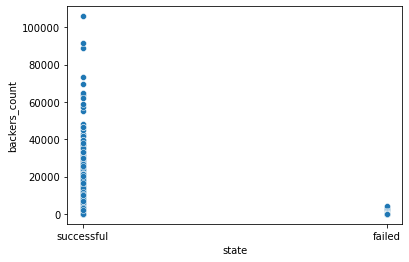

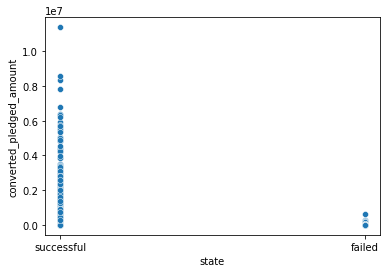

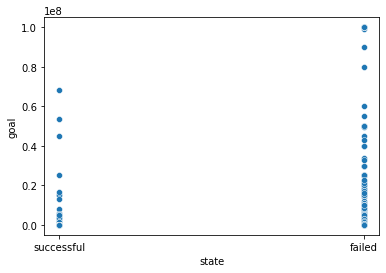

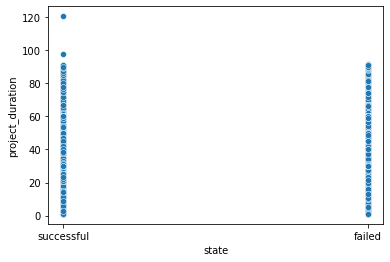

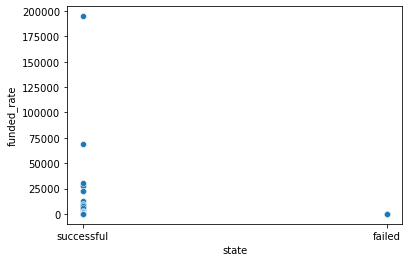

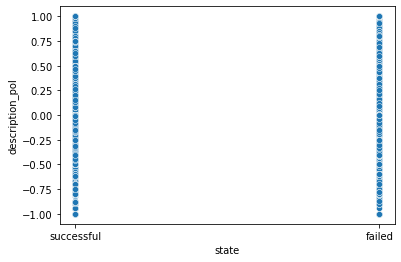

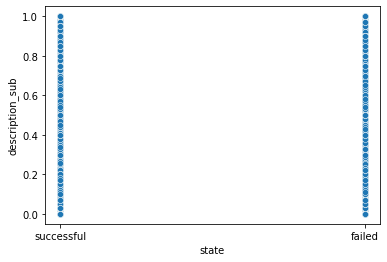

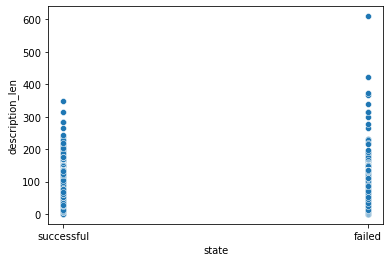

In [18]:
for column in df.select_dtypes(np.number).columns:
    sns.scatterplot(data=df, x="state", y=(df[column]))
    plt.show()

In [19]:
sns.pairplot(num_df)

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000001FDD1149280> (for post_execute):


KeyboardInterrupt: 

#### check normal distribution

### categorical variables

#### wordcloud

https://www.datacamp.com/community/tutorials/wordcloud-python

https://www.searchenginejournal.com/predict-content-success-python/387064/#close

In [38]:
?WordCloud

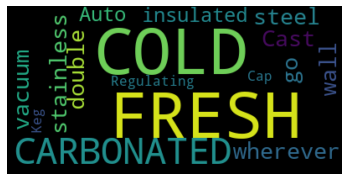

In [40]:
# Start with one review:
text = df['blurb'].iloc[0]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [20]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
plt.rcParams['figure.figsize'] = (13, 13)
wordcloud = WordCloud(stopwords=STOPWORDS,background_color = 'black', width = 1000,  height = 1000, max_words = 121).generate(' '.join(df['description']))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular Words in project description',fontsize = 30)
plt.show()

TypeError: sequence item 3799: expected str instance, float found

### mixed analysis

### projects per weekday

In [46]:
df.groupby(["target"])["funded_rate"].mean().sort_values(ascending=False)

target
True     10.350080
False     0.117567
Name: funded_rate, dtype: float64

### projects per category

category_parent_name

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
people = ('Tom', 'Dick', 'Harry', 'Slim', 'Jim')
y_pos = np.arange(len(people))
performance = 3 + 10 * np.random.rand(len(people))
error = np.random.rand(len(people))

ax.barh(y_pos, performance, xerr=error, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(df['category_parent_name'])
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Performance')
ax.set_title('How fast do you want to go today?')

plt.show()

In [ ]:
# top 30 runtime movies on Hulu = projects with top funding_rate
top_30_screenplay = hulu_movies.sort_values(by = 'screenplay', ascending = False).head(30)
plt.figure(figsize = (15, 10))
sns.barplot(data = top_30_screenplay, y = 'Title', x = 'screenplay', hue = 'Country', dodge = False)
plt.legend(loc = 'lower right')
plt.xlabel('Total Hours')
plt.ylabel('Movie')
plt.title('Top 30 movies by Run Time')
plt.show()

### Check for Correlation

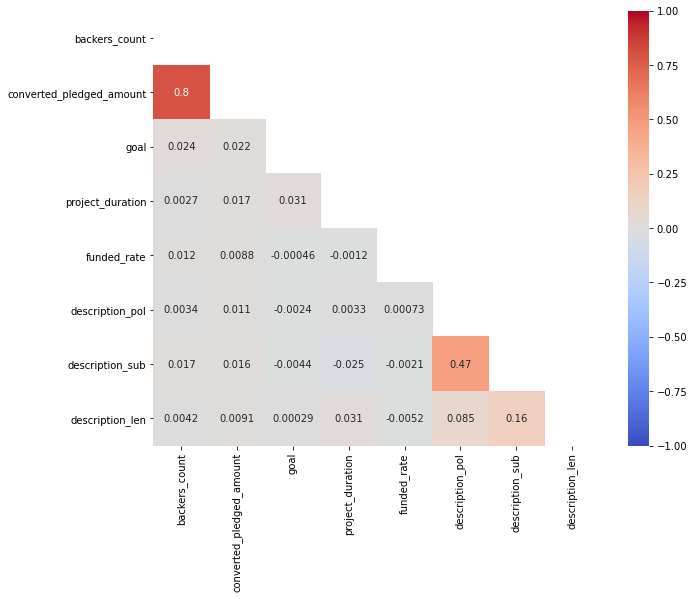

In [21]:
#round(df.corr()['death_event'].sort_values(ascending=False),2)

# create correlation heatmap 

mask = np.zeros_like(df.corr())

mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='coolwarm')

plt.show()

## outliers

### check for outliers in num_df

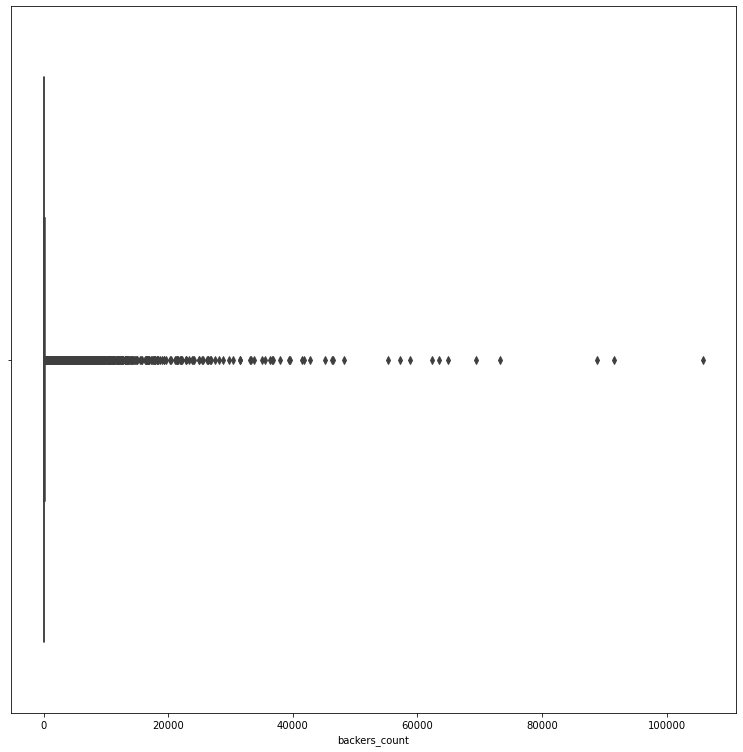

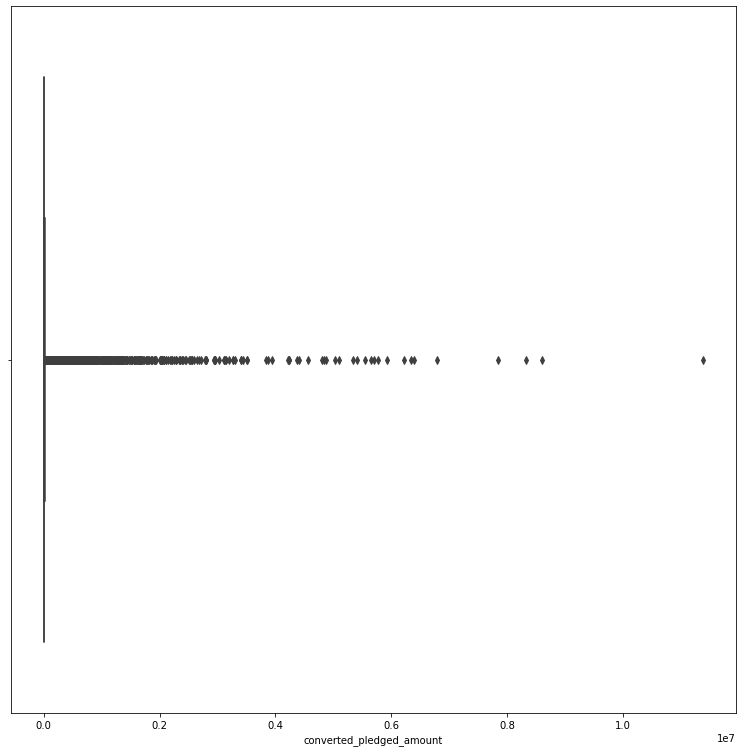

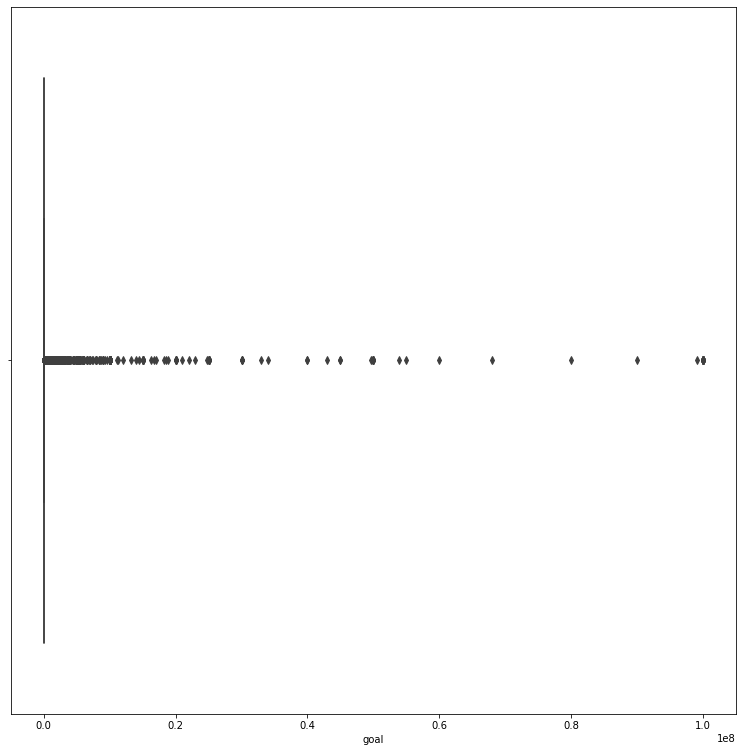

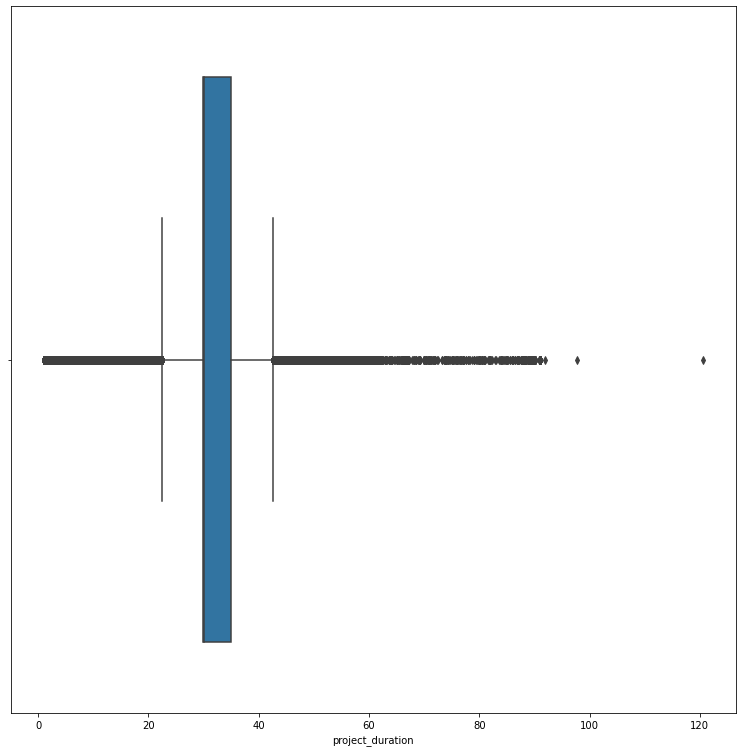

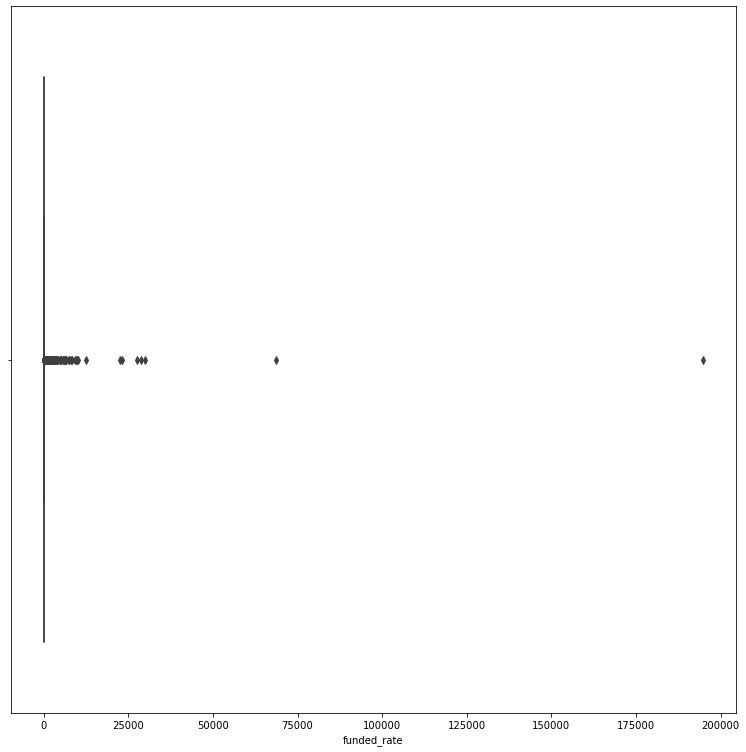

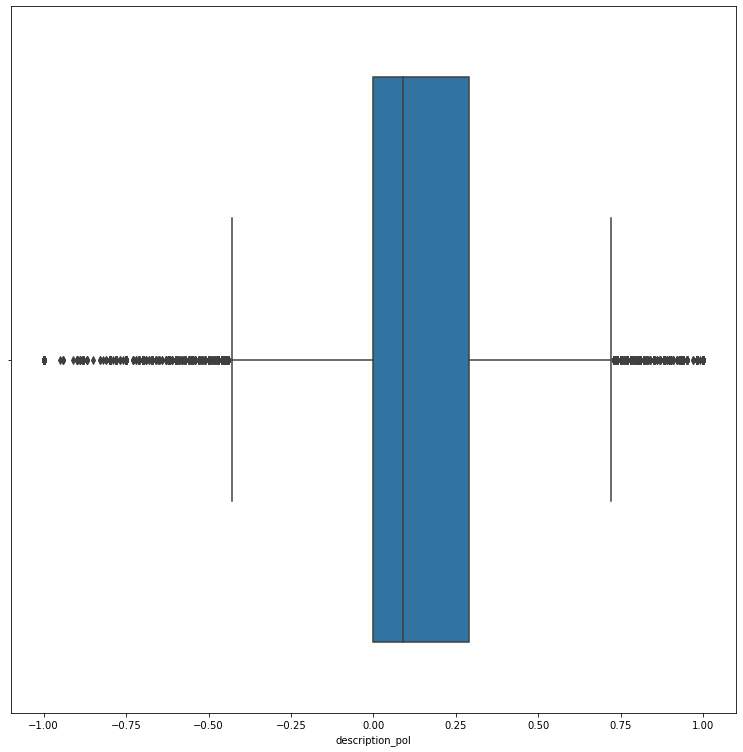

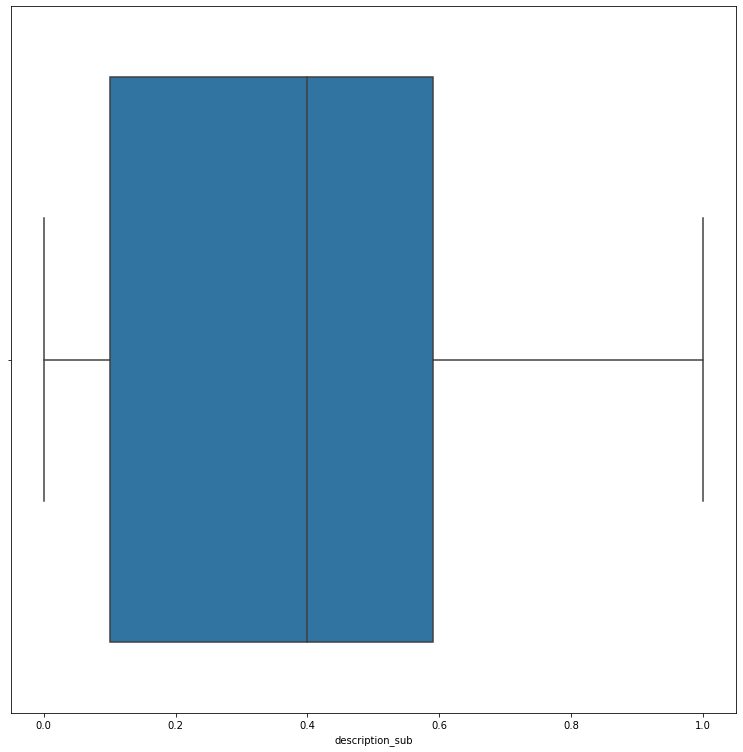

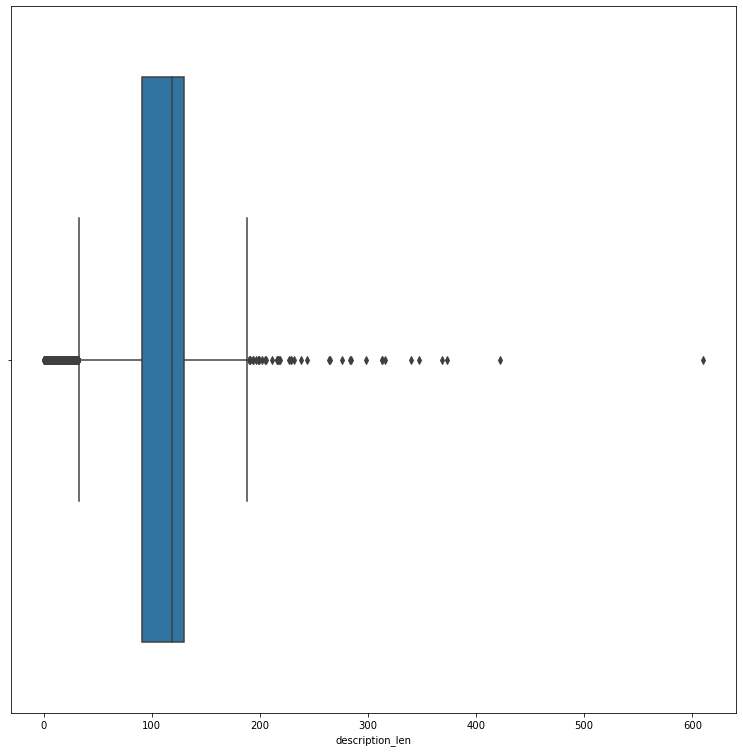

In [22]:
for column in num_df.columns:
    sns.boxplot(num_df[column])
    plt.show()

### deal with outliers in num_df

## scaling


- `Standard scaler`: Removes the mean and scales the data to unit variance. For each column, each value in the column is subtracted by the mean of the column and then divided by the standard deviation.
- `Min-max scaler`: It scales the data in the range of [0,1]. For each column, each value in the column is subtracted by the max of the column and then divided by the difference of max and min of the column. It is very sensitive to the presence of outliers.
- `Normalize`: It rescales the vector to have a unit norm. This means that, for each column, each value is divided by the magnitude of the column. The magnitude is calculated as the euclidean distance.


### StandardScaler

In [65]:
from sklearn.preprocessing import StandardScaler
transformer = StandardScaler().fit(X_num)
x_standardized = transformer.transform(X_num)
x_standardized

### MinMaxScaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler
transformer = MinMaxScaler().fit(numerical)
x_min_max = transformer.transform(numerical)
x_min_max

### Normalizer

In [ ]:
from sklearn.preprocessing import Normalizer
transformer = Normalizer().fit(numerical)
x_normalized = transformer.transform(numerical)
x_normalized

## data imbalances

### check whether data is imbalanced

successful    108652
failed         75902
Name: state, dtype: int64

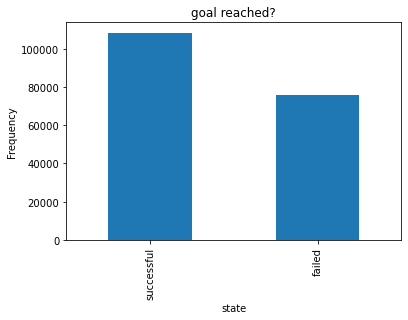

In [55]:
pd.value_counts(df['state']).plot.bar()
plt.title('goal reached?')
plt.xlabel('state')
plt.ylabel('Frequency')
df['state'].value_counts()

**YES** the data is a bit unbalanced as there are 108.652 (58.86%) successful and only 75.902 (41.12%) failed projects.

In [56]:
successful=108652
failed=75902
total=successful+failed

In [58]:
failed/total

0.411272581466671

In [59]:
successful/total

0.588727418533329

### deal with imbalances

#### Manual upsampling

In [ ]:
successful = df[df['state'] == 'successful'].sample(400)
failed = df[df['state'] == 'failed'].sample(400, replace=True)

upsampled = pd.concat([successful, failed]).sample(frac=1)
upsampled

#### SMOTE for upsampling

I have decided to upsample the minority class by using SMOTE. Why did I chose this?

In [63]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

X = df.drop('state', axis=1)
y = df['state']

X_sm, y_sm = smote.fit_resample(X, y)
y_sm.value_counts()

ValueError: could not convert string to float: 'the United States'

#### TomekLinks for downsampling

could be good because of the relatively small imbalance

In [ ]:
from imblearn.under_sampling import TomekLinks

X = df.drop('state', axis=1)
y = df['state']

tomek = TomekLinks()
X_tl, y_tl = tomek.fit_resample(X, y)
y_tl.value_counts()

## encode categoricals

### create test df to try model

In [38]:
df = df.drop(['Unnamed: 0', 'backers_count', 'converted_pledged_amount',
       'category_analytics_name', 'category_slug',
       'created_at_date', 'created_at_time', 
       'launched_at_date', 'launched_at_time', 
       'deadline_date', 'deadline_time', 'funded_rate', 'description',
       'description_kw'], axis=1)

In [39]:
df.columns

Index(['country_displayable_name', 'goal', 'state', 'category_name',
       'category_parent_name', 'created_at_weekday', 'launched_at_weekday',
       'deadline_weekday', 'project_duration', 'blurb_language',
       'description_pol', 'description_sub', 'description_len'],
      dtype='object')

### x/y split

In [40]:
y = df['state']
X = df.drop('state', axis=1)

### encoding

In [41]:
X.sample(5)

,country_displayable_name,goal,category_name,category_parent_name,created_at_weekday,launched_at_weekday,deadline_weekday,project_duration,blurb_language,description_pol,description_sub,description_len
13143,the United States,10000.0,Robots,Technology,Saturday,Friday,Sunday,30.000000,en,0.00,0.00,125
17744,the United States,10000.0,Drinks,Food,Tuesday,Thursday,Saturday,30.000000,en,0.23,0.42,128
28845,the United States,5000.0,Public Art,Art,Friday,Thursday,Tuesday,19.021539,en,0.00,0.00,101
19727,Germany,700.0,Accessories,Fashion,Wednesday,Sunday,Sunday,28.000000,en,0.00,0.00,58
159170,the United States,5000.0,Narrative Film,Film & Video,Saturday,Tuesday,Thursday,30.000000,en,-0.25,0.47,131


In [42]:
X = pd.get_dummies(X, columns=['country_displayable_name', 'category_name', 'category_parent_name', 'created_at_weekday', 'launched_at_weekday', 'deadline_weekday', 'blurb_language'])

In [43]:
X.sample(5)

,goal,project_duration,description_pol,description_sub,description_len,country_displayable_name_Australia,country_displayable_name_Austria,country_displayable_name_Belgium,country_displayable_name_Canada,country_displayable_name_Denmark,...,blurb_language_sq,blurb_language_sv,blurb_language_sw,blurb_language_tl,blurb_language_tr,blurb_language_vo,blurb_language_wa,blurb_language_xh,blurb_language_zh,blurb_language_zu
142998,7000.0,25.594375,0.00,0.00,117,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
164490,2800.0,35.000000,0.13,0.55,117,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5288,300.0,40.000000,-0.29,0.54,26,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
179343,100000.0,30.000000,0.00,0.00,75,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
61379,10000.0,45.000000,0.36,0.61,122,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## build model

### join numerical and categorical variables

In [ ]:
X_num.shape, X_cat.shape

In [ ]:
model_df = pd.merge(X_cat, X_num, left_index=True, right_index=True)

In [ ]:
model_df.shape

In [ ]:
model_df

### test and train split

In [46]:
classification.score(X_test, y_test) # checking the score without the need for predictions
# 0.8729913265649163

0.608869984557449

In [47]:
# to get predictions
predictions = classification.predict(X_test)
predictions

array(['successful', 'successful', 'successful', ..., 'successful',
       'successful', 'successful'], dtype=object)

In [48]:
y_test

64582         failed
111026    successful
71832     successful
143066    successful
36632     successful
             ...    
126644    successful
149116        failed
27231         failed
157066    successful
111909    successful
Name: state, Length: 36911, dtype: object

In [49]:
# to get the probability instead
predictions_ = classification.predict_proba(X_test)
predictions_

array([[0.39303119, 0.60696881],
       [0.42541358, 0.57458642],
       [0.4251216 , 0.5748784 ],
       ...,
       [0.44266124, 0.55733876],
       [0.3960452 , 0.6039548 ],
       [0.39533711, 0.60466289]])

## evaluation of the model

### Logistic Regression Metrics

Concepts:
- Sensitivity: True Positives rate = TP/(TP+FN)
- Specificity: True Negatives rate = TN/(TN+FP)

There are many metrics to aid us on evaluating our model. 
Some famous ones are:
- Accuracy = (TP + TN)/(TP+TN+FP+FN);
- AUC-ROC (Area Under the Curve - Receiver Operating Characteristics);
- F1 score = 2*(precision * recall)/(precision+recall);
- Precision = TP/(TP+FP) - when you rather be sure it is a positive;
- Recall (sensitivity) = TP/(TP+FN) - when we want to get most positives as possible.

More metrics and when to use each: [here](https://towardsdatascience.com/the-5-classification-evaluation-metrics-you-must-know-aa97784ff226).

## conclusion